In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()  #FontProperties폰트지정함수 위치,이름(맑은고딕)
plt.rc("font", family=font_name)  

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [ ]:
import folium
from folium.plugins import MarkerCluster
from tqdm.notebook import tqdm

In [ ]:
charging = pd.read_csv("data/한국전력공사_전기차 충전소 충전량_20220330.csv", low_memory=False)

In [ ]:
charging.head(5)

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
0,울산시,울산시,국민체육센터,NaN,USCE20040701,울산광역시 남구 야음동 184-1,급속,50.0,17.72,0,40,2022-01-01,2022-01-01 09:51:51,2022-01-01 10:31:51
1,울산시,울산시,국민체육센터,NaN,USCE20040701,울산광역시 남구 야음동 184-1,급속,50.0,11.96,0,40,2022-01-01,2022-01-01 10:33:43,2022-01-01 11:13:43
2,경기북부,동두천,동두천지사,급속01,876,경기도 동두천시 평화로 2262,급속,50.0,8.83,0,21,2022-01-01,2022-01-01 18:38:26,2022-01-01 18:59:43
3,경기북부,동두천,동두천지사,급속01,876,경기도 동두천시 평화로 2262,급속,50.0,50.00,1,55,2022-01-01,2022-01-01 19:10:29,2022-01-01 21:05:43
4,경기북부,동두천,동두천지사,급속01,876,경기도 동두천시 평화로 2262,급속,50.0,0.92,0,1,2022-01-01,2022-01-01 12:33:09,2022-01-01 12:34:36


In [ ]:
charging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   본부        1048575 non-null  object        
 1   사업소       1048575 non-null  object        
 2   충전소명      1048575 non-null  object        
 3   충전기       1048437 non-null  object        
 4   충전기ID     1048575 non-null  object        
 5   주소        1048235 non-null  object        
 6   충전기구분     1048575 non-null  object        
 7   충전용량      992853 non-null   float64       
 8   충전량       1048575 non-null  float64       
 9   충전시간      1048575 non-null  int64         
 10  충전분       1048575 non-null  int64         
 11  충전종료일자    1048575 non-null  datetime64[ns]
 12  충전시작시각    1048575 non-null  object        
 13  충전종료시각    1048575 non-null  object        
 14  weekdays  1048575 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage

# 전처리

In [ ]:
#컬럼 삭제
del charging['본부']
del charging['사업소']
del charging['충전기']
del charging['본부']
del charging['충전종료일자']

KeyError: '본부'

In [ ]:
charging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   충전소명    1048575 non-null  object 
 1   충전기ID   1048575 non-null  object 
 2   주소      1048235 non-null  object 
 3   충전기구분   1048575 non-null  object 
 4   충전용량    992853 non-null   float64
 5   충전량     1048575 non-null  float64
 6   충전시간    1048575 non-null  int64  
 7   충전분     1048575 non-null  int64  
 8   충전종료일자  1048575 non-null  object 
 9   충전시작시각  1048575 non-null  object 
 10  충전종료시각  1048575 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 88.0+ MB


## '주소' 전처리
- 결측치 삭제
- 문자에 'null' 포함된 값 삭제

In [ ]:
charging = charging[charging['주소'].notnull()]

In [ ]:
charging['주소누락치1']=charging['주소'].str.extract(r'(null)')

In [ ]:
#charging['주소누락치']=charging['주소'].str.extract(r'(.+[null].+)')

In [ ]:
charging.head()

,충전소명,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,주소누락치1,주소누락치
0,국민체육센터,USCE20040701,울산광역시 남구 야음동 184-1,급속,50.0,17.72,0,40,2022-01-01,2022-01-01 09:51:51,2022-01-01 10:31:51,NaN,NaN
1,국민체육센터,USCE20040701,울산광역시 남구 야음동 184-1,급속,50.0,11.96,0,40,2022-01-01,2022-01-01 10:33:43,2022-01-01 11:13:43,NaN,NaN
2,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,8.83,0,21,2022-01-01,2022-01-01 18:38:26,2022-01-01 18:59:43,NaN,NaN
3,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,50.00,1,55,2022-01-01,2022-01-01 19:10:29,2022-01-01 21:05:43,NaN,NaN
4,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,0.92,0,1,2022-01-01,2022-01-01 12:33:09,2022-01-01 12:34:36,NaN,NaN


In [ ]:
charging["주소누락치1"].notnull().sum()

2031

In [ ]:
charging["주소누락치"].notnull().sum()

2524

In [ ]:
charging.to_csv("data/chargingtest.csv")

In [ ]:
charging = charging[charging["주소누락치1"].isnull()]

In [ ]:
del charging['주소누락치']

In [ ]:
charging.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919038 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   충전소명    919038 non-null  object 
 1   충전기ID   919038 non-null  object 
 2   주소      919038 non-null  object 
 3   충전기구분   919038 non-null  object 
 4   충전용량    919038 non-null  float64
 5   충전량     919038 non-null  float64
 6   충전시간    919038 non-null  int64  
 7   충전분     919038 non-null  int64  
 8   충전종료일자  919038 non-null  object 
 9   충전시작시각  919038 non-null  object 
 10  충전종료시각  919038 non-null  object 
 11  주소누락치1  0 non-null       object 
dtypes: float64(2), int64(2), object(8)
memory usage: 91.2+ MB


## '충전용량' 전처리
- 7, 50kW 만 남기고 나머지 삭제

In [ ]:
charging = charging[(charging['충전용량']==50.0) | (charging['충전용량']==7.0)]

In [ ]:
len(charging)

922095

## '충전시간'&'충전분' 전처리

- 충전시간 변수에 시간+분 포함
- 충전분 변수 삭제
- 5분≤ 충전시간 ≤24이하 이외의 값 삭제

In [ ]:
charging['충전시간'] = charging['충전시간'] + round(charging['충전분'] / 60 , 2)

In [ ]:
del charging['충전분']

In [ ]:
charging = charging[(charging['충전시간'] >= 0.08) & (charging['충전시간']<= 24)]

In [ ]:
len(charging)

887170

In [ ]:
charging.head(5)

,충전소명,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전종료일자,충전시작시각,충전종료시각
0,국민체육센터,USCE20040701,울산광역시 남구 야음동 184-1,급속,50.0,17.72,0.67,2022-01-01,2022-01-01 09:51:51,2022-01-01 10:31:51
1,국민체육센터,USCE20040701,울산광역시 남구 야음동 184-1,급속,50.0,11.96,0.67,2022-01-01,2022-01-01 10:33:43,2022-01-01 11:13:43
2,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,8.83,0.35,2022-01-01,2022-01-01 18:38:26,2022-01-01 18:59:43
3,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,50.00,1.92,2022-01-01,2022-01-01 19:10:29,2022-01-01 21:05:43
4,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,0.92,0.02,2022-01-01,2022-01-01 12:33:09,2022-01-01 12:34:36


In [ ]:
charging.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886689 entries, 0 to 1048573
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   충전소명     886689 non-null  object 
 1   충전기ID    886689 non-null  object 
 2   주소       886689 non-null  object 
 3   충전기구분    886689 non-null  object 
 4   충전용량     886689 non-null  float64
 5   충전량      886689 non-null  float64
 6   충전시간     886689 non-null  float64
 7   충전종료일자   886689 non-null  object 
 8   충전시작시각   886689 non-null  object 
 9   충전종료시각   886689 non-null  object 
 10  시간당 충전량  886689 non-null  float64
dtypes: float64(4), object(7)
memory usage: 81.2+ MB


## '충전량' 전처리
- 이상치 처리
    * 시간당 충전량 ≥ 충전용량(7 or 50) 이외의 값은 삭제
    * 충전량 > 80kW 인 값 삭제

In [ ]:
#충전량 ≥ 80kW 인 값 삭제
charging = charging[charging['충전량']<=80]

In [ ]:
len(charging)

921153

In [ ]:
#시간당 충전량 ≥ 충전용량(7 or 50) 이외의 값은 삭제
#if charging[charging['충전용량']==50.0]:
    
charging['시간당 충전량'] = charging['충전량']/charging['충전시간']



C:\Users\pwngu\AppData\Local\Temp\ipykernel_26204\2848962847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging['시간당 충전량'] = charging['충전량']/charging['충전시간']


## ------------공통으로 순서맞춰서 전처리--------------------

In [ ]:
charging = pd.read_csv("data/한국전력공사_전기차 충전소 충전량_20220330.csv", low_memory=False)

In [ ]:
#명훈님 순서대로 전처리 : 충전용량 - 충전량 - 주소 - 충전시간
charging_test = charging

In [ ]:
charging = charging[(charging['충전용량']==50.0) | (charging['충전용량']==7.0)]

In [ ]:
charging = charging[charging['충전량']<=80]

In [ ]:
charging['주소누락치1']=charging['주소'].str.extract(r'(null)')
charging = charging[charging["주소누락치1"].isnull()]

In [ ]:
del charging['주소누락치1']

In [ ]:
charging = charging[charging['주소'].notnull()]

In [ ]:
charging['충전시간'] = charging['충전시간'] + round(charging['충전분'] / 60 , 2)

C:\Users\pwngu\AppData\Local\Temp\ipykernel_26204\933594137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging['충전시간'] = charging['충전시간'] + round(charging['충전분'] / 60 , 2)


In [ ]:
charging = charging[(charging['충전시간'] >= 0.08) & (charging['충전시간']<= 24)]

In [ ]:
len(charging)

887170

In [ ]:
charging = charging[~charging['주소'].str.contains("제주", na=False, case=False)]

len(charging)

813737

In [ ]:
del charging['본부']
del charging['사업소']
del charging['충전기']
del charging['본부']
del charging['충전종료일자']
del charging['충전분']

KeyError: '본부'

In [ ]:
charging.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813737 entries, 0 to 1048573
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   충전소명    813737 non-null  object 
 1   충전기ID   813737 non-null  object 
 2   주소      813737 non-null  object 
 3   충전기구분   813737 non-null  object 
 4   충전용량    813737 non-null  float64
 5   충전량     813737 non-null  float64
 6   충전시간    813737 non-null  float64
 7   충전분     813737 non-null  int64  
 8   충전종료일자  813737 non-null  object 
 9   충전시작시각  813737 non-null  object 
 10  충전종료시각  813737 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 74.5+ MB


In [ ]:
charging.head()

,충전소명,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
0,국민체육센터,USCE20040701,울산광역시 남구 야음동 184-1,급속,50.0,17.72,0.67,40,2022-01-01,2022-01-01 09:51:51,2022-01-01 10:31:51
1,국민체육센터,USCE20040701,울산광역시 남구 야음동 184-1,급속,50.0,11.96,0.67,40,2022-01-01,2022-01-01 10:33:43,2022-01-01 11:13:43
2,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,8.83,0.35,21,2022-01-01,2022-01-01 18:38:26,2022-01-01 18:59:43
3,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,50.00,1.92,55,2022-01-01,2022-01-01 19:10:29,2022-01-01 21:05:43
5,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,43.01,0.95,57,2022-01-01,2022-01-01 12:37:45,2022-01-01 13:35:12


In [ ]:
charging['실충전시간'] = round(charging['충전량']/charging['충전용량'], 2)
charging['미사용시간'] = round(charging['충전시간'] - charging['실충전시간'], 2)

C:\Users\pwngu\AppData\Local\Temp\ipykernel_26204\3047438253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging['실충전시간'] = round(charging['충전량']/charging['충전용량'], 2)
C:\Users\pwngu\AppData\Local\Temp\ipykernel_26204\3047438253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging['미사용시간'] = round(charging['충전시간'] - charging['실충전시간'], 2)


In [ ]:
charging

,충전소명,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,실충전시간,미사용시간
0,국민체육센터,USCE20040701,울산광역시 남구 야음동 184-1,급속,50.0,17.72,0.67,40,2022-01-01,2022-01-01 09:51:51,2022-01-01 10:31:51,0.35,0.32
1,국민체육센터,USCE20040701,울산광역시 남구 야음동 184-1,급속,50.0,11.96,0.67,40,2022-01-01,2022-01-01 10:33:43,2022-01-01 11:13:43,0.24,0.43
2,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,8.83,0.35,21,2022-01-01,2022-01-01 18:38:26,2022-01-01 18:59:43,0.18,0.17
3,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,50.00,1.92,55,2022-01-01,2022-01-01 19:10:29,2022-01-01 21:05:43,1.00,0.92
5,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,43.01,0.95,57,2022-01-01,2022-01-01 12:37:45,2022-01-01 13:35:12,0.86,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,더샵스타시티 아파트,1921,서울특별시 광진구 자양동 아차산로 262,완속,7.0,5.11,1.50,30,2022-03-30,2022-03-30 20:44:55,2022-03-30 22:15:04,0.73,0.77
1048569,공지천 공영주차장,5928,강원도 춘천시 영서로 2438,급속,50.0,37.64,1.00,0,2022-03-30,2022-03-30 21:15:44,2022-03-30 22:15:52,0.75,0.25
1048570,가재마을3단지,4499,세종특별자치시 도움3로 159,완속,7.0,33.12,5.35,21,2022-03-30,2022-03-30 17:03:42,2022-03-30 22:25:05,4.73,0.62
1048572,강원도개발공사,9433,강원도 춘천시 외솔길 17,급속,50.0,40.42,1.00,0,2022-03-30,2022-03-30 15:19:39,2022-03-30 16:19:45,0.81,0.19


In [ ]:
charging.to_csv("data/Pre_Charging.csv", index=False)

---

### 종료일자 기준 1/28~2/3 뽑아내기 : 전처리 데이터로 다시 할 것

In [ ]:
#충전종료일자 datetime형식으로 변환
charging['충전종료일자'] = pd.to_datetime(charging['충전종료일자'],format='%Y/%m/%d')

In [ ]:
holiday = charging[charging['충전종료일자'].between('2022/01/28', '2022/02/03')]

In [ ]:
holiday_plot = holiday.set_index(['충전종료일자'])

<AxesSubplot:xlabel='충전종료일자'>

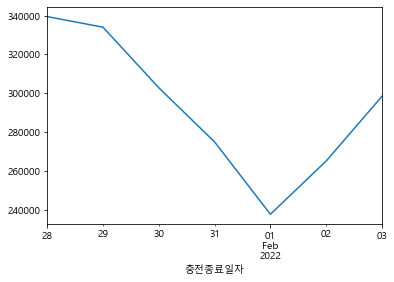

In [ ]:
holiday_plot.groupby('충전종료일자').sum()['충전량'].plot()

In [ ]:
ordinary = charging[charging['충전종료일자'].between('2022/03/18', '2022/03/24')]

<AxesSubplot:xlabel='충전종료일자'>

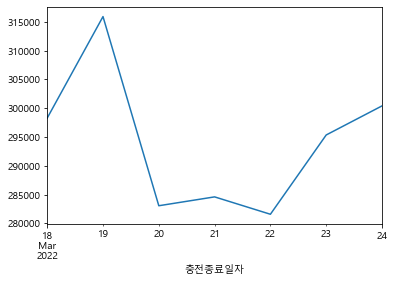

In [ ]:
ordinary.groupby('충전종료일자').sum()['충전량'].plot()

<AxesSubplot:xlabel='충전종료일자'>

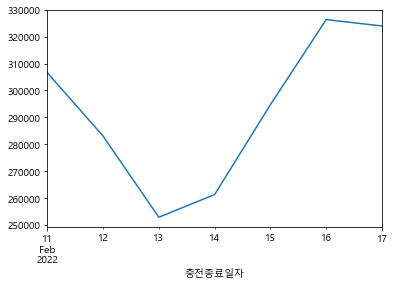

In [ ]:
charging[charging['충전종료일자'].between('2022/02/11', '2022/02/17')].groupby('충전종료일자').sum()['충전량'].plot()

<AxesSubplot:xlabel='충전종료일자'>

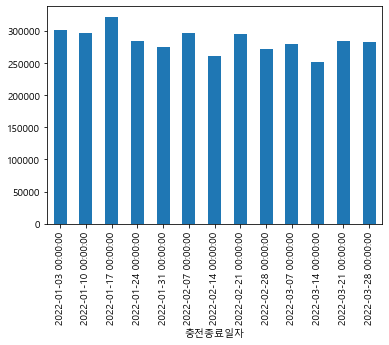

In [ ]:
monday.groupby('충전종료일자').sum()['충전량'].plot(kind='bar')

In [ ]:
#요일별

In [ ]:
charging["weekday"]=charging["충전종료일자"].dt.dayofweek
charging["weekdays"]=charging["weekday"].map({0:"월요일", 1:"화요일", 2:"수요일", 3:"목요일", 4:"금요일", 5:"토요일", 6:"일요일"})

In [ ]:
charging.groupby("weekdays").mean()[["충전량"]]

,충전량
weekdays,
금요일,25.763877
목요일,25.112715
수요일,25.062189
월요일,24.718193
일요일,26.406616
토요일,33.593447
화요일,24.741228


<AxesSubplot:xlabel='weekdays', ylabel='충전량'>

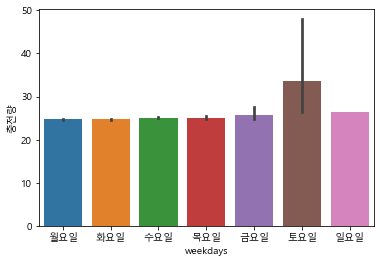

In [ ]:
sns.barplot(x="weekdays", y="충전량", data=charging, 
            order=["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"])

<AxesSubplot:xlabel='weekdays', ylabel='충전량'>

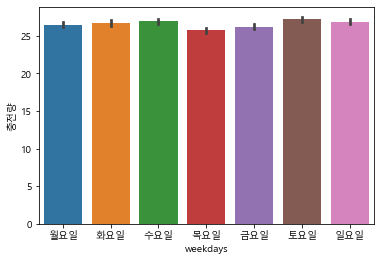

In [ ]:
sns.barplot(x="weekdays", y="충전량", data=holiday, 
            order=["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"])

<AxesSubplot:xlabel='weekdays', ylabel='충전량'>

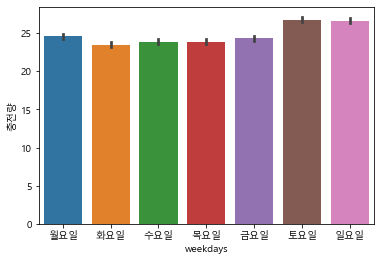

In [ ]:
sns.barplot(x="weekdays", y="충전량", data=ordinary, 
            order=["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"])

In [ ]:
#시간대별

In [ ]:
charging['충전시작시각'] = pd.to_datetime(charging['충전시작시각'],format='%Y/%m/%d %H:%M:%S')

In [ ]:
charging["hour"]=charging["충전시작시각"].dt.hour

In [ ]:
hour = charging.groupby(["hour"]).mean()[["충전량"]]

In [ ]:
hour

,충전량
hour,
0,31.409964
1,33.286419
2,31.817765
3,32.275290
4,32.214080
5,28.572728
6,25.471564
7,24.328948
8,23.888453


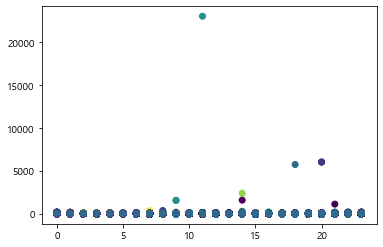

In [ ]:
plt.scatter(charging["hour"], charging["충전량"], c=charging["weekday"])

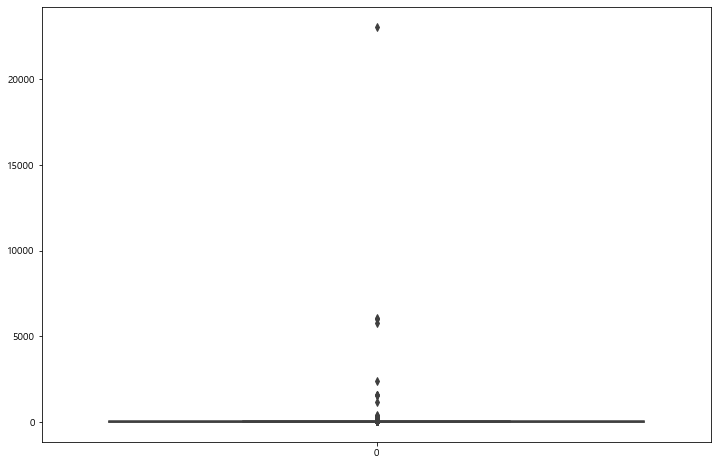

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=charging["충전량"])
plt.show()

In [ ]:
charging["충전시간"].sort_values(ascending=False).head(80)

23253     12288
419232      845
542868      582
201425      311
460702      267
          ...  
710892       95
871906       94
361983       94
33289        94
32871        94
Name: 충전시간, Length: 80, dtype: int64

In [ ]:
#이상치 삭제

In [ ]:
charging["충전시간"].max()

12288

In [ ]:
charging["충전량"].max()

23062.8438

In [ ]:
charging.loc[charging["충전량"]==1094613.89]

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,weekdays,weekday,hour
840453,경남,마산,한전마산지사,급속01,219,경상남도 창원시 마산회원구 3.15대로 966,급속,50.0,1094613.89,0,44,2022-03-12,2022-03-12 14:11:12,2022-03-12 14:55:55,토요일,5,14


In [ ]:
charging[charging["충전량"]==1094613.89].index

Int64Index([840453], dtype='int64')

In [ ]:
charging = charging.drop(charging[charging["충전량"]==1094613.89].index)

In [ ]:
charging = charging.drop(charging[charging["충전량"]==134257.75].index)

In [ ]:
charging.head(5)

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,weekdays,weekday,hour
0,울산시,울산시,국민체육센터,NaN,USCE20040701,울산광역시 남구 야음동 184-1,급속,50.0,17.72,0,40,2022-01-01,2022-01-01 09:51:51,2022-01-01 10:31:51,토요일,5,9
1,울산시,울산시,국민체육센터,NaN,USCE20040701,울산광역시 남구 야음동 184-1,급속,50.0,11.96,0,40,2022-01-01,2022-01-01 10:33:43,2022-01-01 11:13:43,토요일,5,10
2,경기북부,동두천,동두천지사,급속01,876,경기도 동두천시 평화로 2262,급속,50.0,8.83,0,21,2022-01-01,2022-01-01 18:38:26,2022-01-01 18:59:43,토요일,5,18
3,경기북부,동두천,동두천지사,급속01,876,경기도 동두천시 평화로 2262,급속,50.0,50.00,1,55,2022-01-01,2022-01-01 19:10:29,2022-01-01 21:05:43,토요일,5,19
4,경기북부,동두천,동두천지사,급속01,876,경기도 동두천시 평화로 2262,급속,50.0,0.92,0,1,2022-01-01,2022-01-01 12:33:09,2022-01-01 12:34:36,토요일,5,12


In [ ]:
_, ax = plt.subplots(2, 4, figsize=(20,10)) 


weekdays_list = ["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"]

#seaborn 선그래프로 그려보기
for i in range(7):
    sns.barplot(x="Hour", y="Rented Bike Count", 
                 data=bike.loc[bike["weekdays"]==weekdays_list[i]],
                ax = ax[i//4, i%4])  #weekdays 값 중에 weekdays_list와 같은 것들
    ax[i//4, i%4].set_title(weekdays_list[i])